#### Import libraries and packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.metrics import mean_squared_error
from sklearn.utils import column_or_1d
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


#### Import dataset

In [2]:
df = pd.read_csv("C:\\Users\\DNV\\OneDrive\\Desktop\\Data-Gold.csv",parse_dates=True,index_col=0)

#### Create a new Timestamp column for time series forecasting

In [3]:
df['Timestamp'] = pd.to_datetime(df.index).astype(np.int64) / 10**9
df_index = df.index
df_open = df['VND'].values.reshape(-1, 1)
df.head()

df

,VND,Timestamp
Date,,
2012-01-02,32202288.50,1.325462e+09
2012-01-03,33607538.00,1.325549e+09
2012-01-04,33923003.00,1.325635e+09
2012-01-05,33628569.00,1.325722e+09
2012-01-06,34000652.75,1.325808e+09
...,...,...
2022-12-26,41586906.00,1.672013e+09
2022-12-27,41894838.00,1.672099e+09
2022-12-28,41727084.00,1.672186e+09


#### Plotting Gold price chart

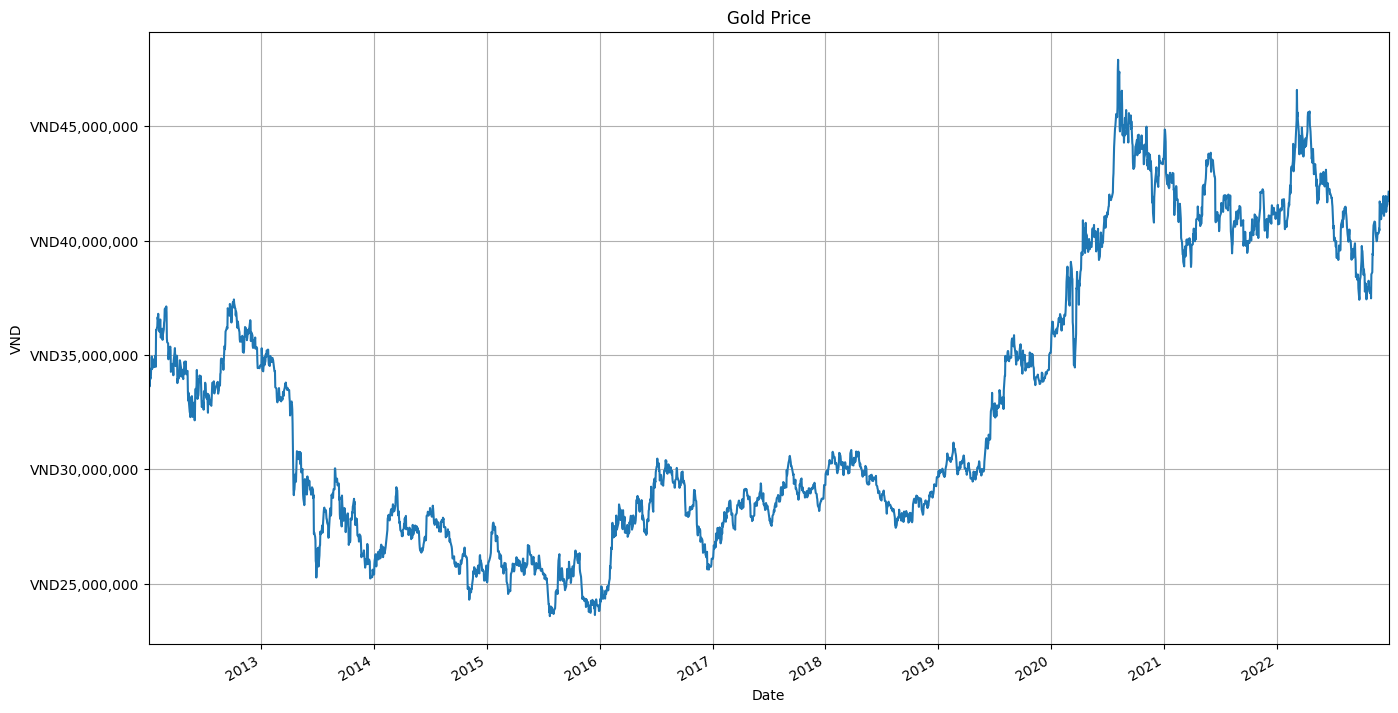

In [4]:
formatter = ticker.StrMethodFormatter('VND{x:,.0f}')

title = 'Gold Price'
ylabel = 'VND'
xlabel = 'Date'

ax = df['VND'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

#### Normalizing / scaling data to facilitate model building

In [5]:
LR_sc = StandardScaler()

df_scaled = df.copy()
df_scaled['VND'] = LR_sc.fit_transform(df_open)
df_scaled

,VND,Timestamp
Date,,
2012-01-02,-0.062575,1.325462e+09
2012-01-03,0.167826,1.325549e+09
2012-01-04,0.219549,1.325635e+09
2012-01-05,0.171274,1.325722e+09
2012-01-06,0.232280,1.325808e+09
...,...,...
2022-12-26,1.476100,1.672013e+09
2022-12-27,1.526588,1.672099e+09
2022-12-28,1.499084,1.672186e+09


In [6]:
X_sc = StandardScaler()
y_sc = StandardScaler()

X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, 0].values.reshape(-1, 1)


X_scaled = X_sc.fit_transform(X)
y_scaled = y_sc.fit_transform(y)


df_scaled = pd.DataFrame(index=df_index)
df_scaled['Timestamp'] = X_scaled
df_scaled['VND'] = y_scaled
df_scaled.head()

,Timestamp,VND
Date,,
2012-01-02,-1.730686,-0.062575
2012-01-03,-1.729824,0.167826
2012-01-04,-1.728962,0.219549
2012-01-05,-1.728100,0.171274
2012-01-06,-1.727237,0.232280


#### Split data for training and testing ( 8-2 )

In [7]:
interrupt = int(len(df_scaled) * .8)

train_data, test_data = df_scaled[:interrupt], df_scaled[interrupt:]
index_test = df_scaled.index[interrupt:]
print(train_data.shape)
print(test_data.shape)

(2296, 2)
(574, 2)


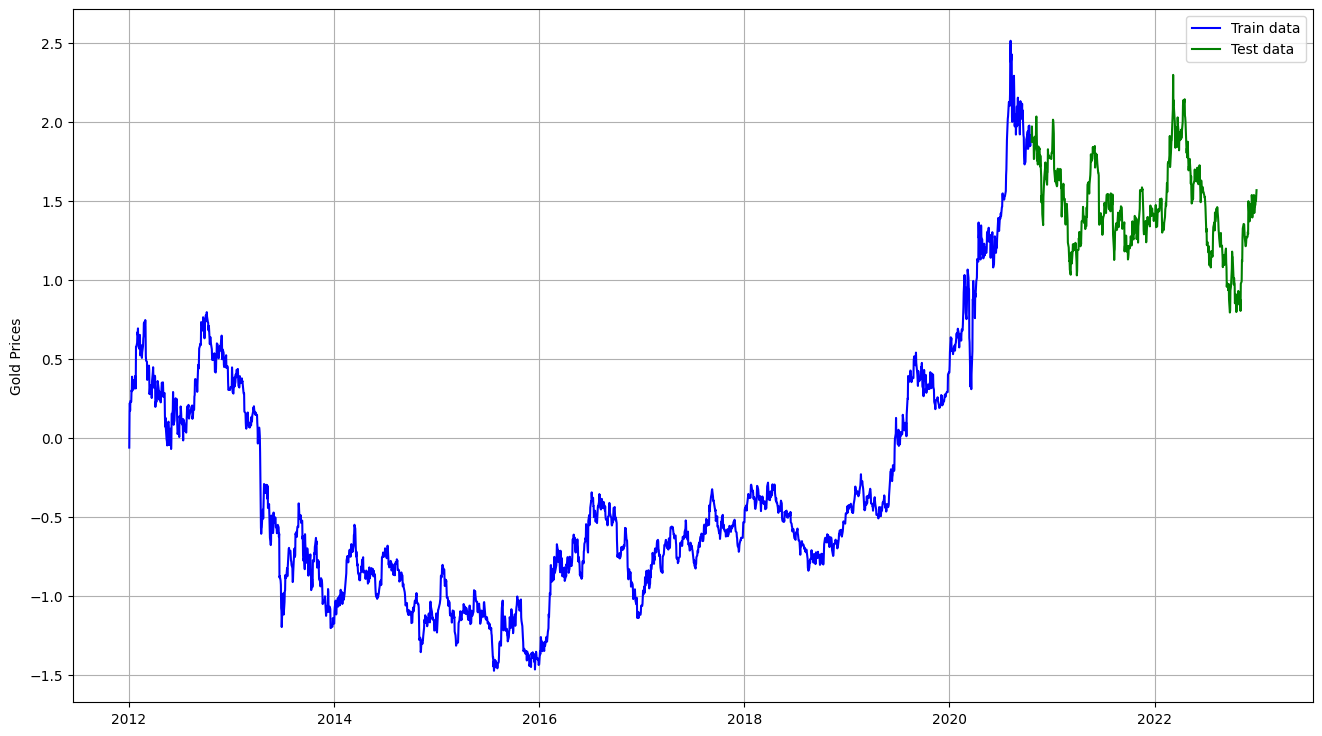

In [8]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.ylabel('Gold Prices')
plt.plot(train_data['VND'], 'blue', label='Train data')
plt.plot(test_data['VND'], 'green', label='Test data')
plt.legend()

#### Determine the independent variable (X) and the dependent variable (y)

In [9]:
X_train = train_data['Timestamp'].values.reshape(-1, 1)
y_train = train_data['VND'].values.reshape(-1, 1)

X_test = test_data['Timestamp'].values.reshape(-1, 1)
y_test = test_data['VND'].values.reshape(-1, 1)

#### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)
pred = LR_model.predict(X_test)
pred

array([[0.0213381 ],
       [0.02157809],
       [0.02181808],
       [0.02205807],
       [0.02277805],
       [0.02301804],
       [0.02325803],
       [0.02349803],
       [0.02373802],
       [0.02445799],
       [0.02469799],
       [0.02493798],
       [0.02517797],
       [0.02541796],
       [0.02613794],
       [0.02637793],
       [0.02661792],
       [0.02685792],
       [0.02709791],
       [0.02781788],
       [0.02805788],
       [0.02829787],
       [0.02853786],
       [0.02877785],
       [0.02949783],
       [0.02973782],
       [0.02997781],
       [0.0302178 ],
       [0.0304578 ],
       [0.03117777],
       [0.03141776],
       [0.03165776],
       [0.03189775],
       [0.03213774],
       [0.03285772],
       [0.03309771],
       [0.0333377 ],
       [0.03357769],
       [0.03381768],
       [0.03453766],
       [0.03477765],
       [0.03501764],
       [0.03525764],
       [0.03549763],
       [0.03621761],
       [0.0364576 ],
       [0.03669759],
       [0.036

#### Transform back to original form

In [11]:
inv_pred = y_sc.inverse_transform(pred.reshape(-1, 1))
inv_test = y_sc.inverse_transform(y_test.reshape(-1, 1))


#### Graph the test set and the prediction results

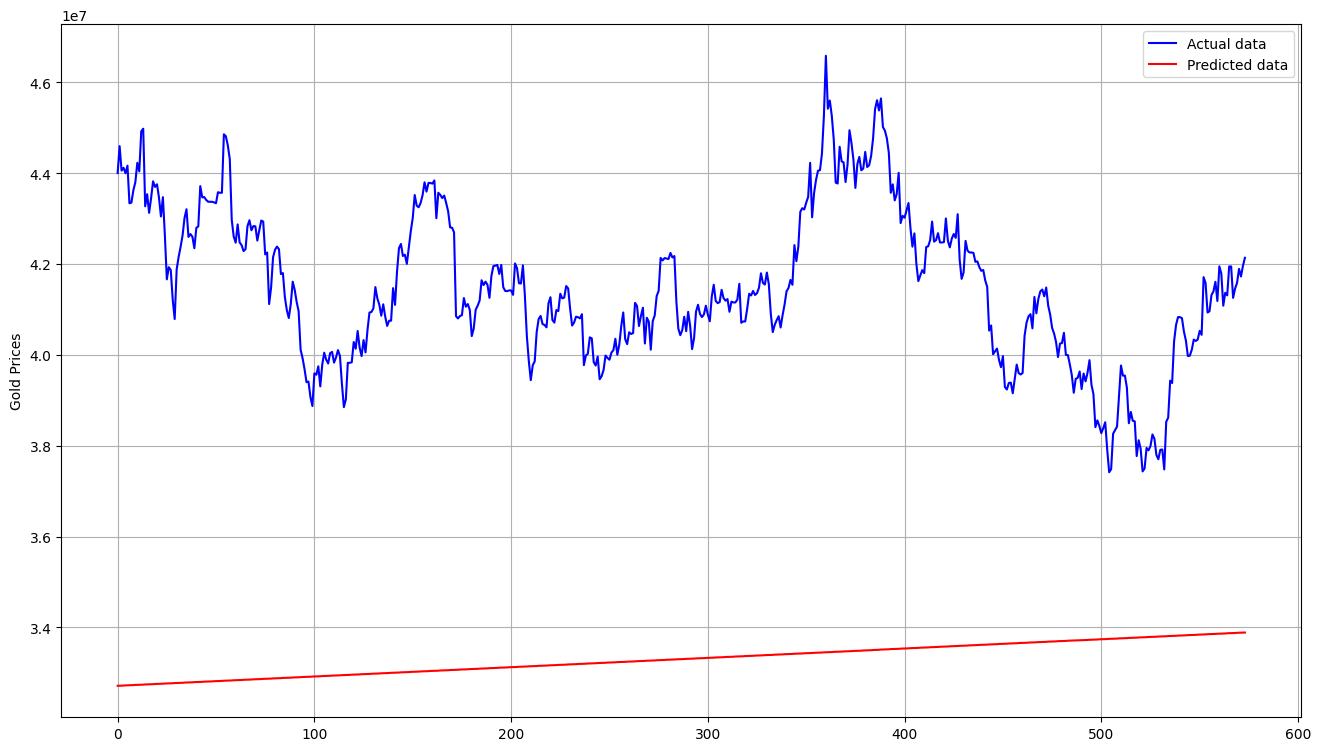

In [12]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.ylabel('Gold Prices')
plt.plot(column_or_1d(inv_test), 'blue', label='Actual data')
plt.plot(column_or_1d(inv_pred), 'red', label='Predicted data')
plt.legend()

#### Model Evaluation

In [15]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(inv_test, inv_pred) 
mape = mean_absolute_percentage_error(inv_test, inv_pred)
mse = mean_squared_error(inv_test, inv_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(inv_test, inv_pred)
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape*100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 8178979.80
MAPE: 19.57%
MSE: 70231449104778.87
RMSE: 8380420.58
R2: -23.72


In [14]:
df_pred = pd.DataFrame(columns=['Actual', 'Pred', 'Error'], index=index_test)
df_pred['Actual'] = column_or_1d(inv_test)
df_pred['Pred'] = column_or_1d(inv_pred)
df_pred['Error'] = df_pred['Actual'] - df_pred['Pred']
df_pred

,Actual,Pred,Error
Date,,,
2020-10-20,44003960.54,3.271409e+07,1.128988e+07
2020-10-21,44597946.44,3.271555e+07,1.188240e+07
2020-10-22,44058317.02,3.271701e+07,1.134130e+07
2020-10-23,44120893.79,3.271848e+07,1.140242e+07
2020-10-26,43999425.29,3.272287e+07,1.127656e+07
...,...,...,...
2022-12-26,41586906.00,3.388069e+07,7.706213e+06
2022-12-27,41894838.00,3.388216e+07,8.012681e+06
2022-12-28,41727084.00,3.388362e+07,7.843464e+06
